In [107]:
import pandas as pd

dat = pd.read_csv("data/conversion_data.csv")

In [102]:
dat['uid'] = dat.apply (lambda row: uuid.uuid4(),axis=1)

dat.head(1)


,country,age,new_user,source,total_pages_visited,converted,uid
0,UK,25,1,Ads,1,0,82f450f5-b5ff-4c18-9380-c5190a95713b


In [103]:
%matplotlib inline

dat.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
uid                    0
dtype: int64

converted       0     1
country                
China       76500   102
Germany     12240   816
UK          45900  2550
US         171360  6732
		   converted
+---------+---------+-------+---------+-------+
| country |   False |  True |   Total |  Rate |
+---------+---------+-------+---------+-------+
| China   |  76,500 |   102 |  76,602 | 0.13% |
| Germany |  12,240 |   816 |  13,056 | 6.25% |
| UK      |  45,900 | 2,550 |  48,450 | 5.26% |
| US      | 171,360 | 6,732 | 178,092 | 3.78% |
+---------+---------+-------+---------+-------+


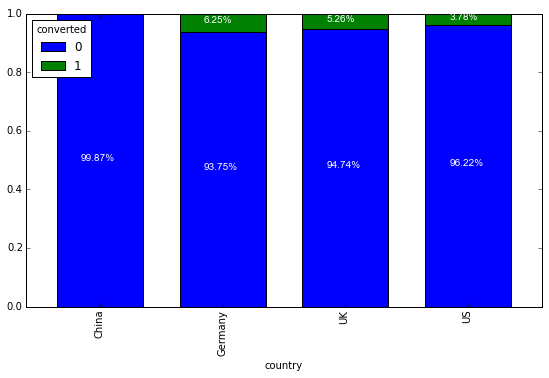

In [57]:
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import numpy as np
import math

def plotStackedBarWithTitle(df, groupByCol, legendFlag, titleString):
    customers = df[['uid', groupByCol, legendFlag]]
    
    #Group By and count
    customer_group = customers.groupby([groupByCol, legendFlag])
    tc = customer_group.uid.nunique()
    tcUnstack = tc.unstack()
    
    #print tcUnstack
    t = PrettyTable([groupByCol,'False','True', 'Total', 'Rate'])
    t.align[groupByCol] = "l"
    t.align['False'] = "r"
    t.align['True'] = "r"
    t.align['Total'] = "r"
    t.align['Rate'] = "r"
    print tcUnstack
    for i in range(len(tcUnstack.index)):
        #print i
        falseCount = tcUnstack[0][i]
        trueCount = tcUnstack[1][i]
        totalCount = falseCount + trueCount
        rate = trueCount *1.0/ totalCount

        falseCountString = "{:,}".format(falseCount)
        trueCountString = "{:,}".format(trueCount)
        totalCountString = "{:,}".format(totalCount)
        rateString = "{:.2%}".format(rate)
        t.add_row([tcUnstack.index[i], falseCountString, trueCountString, totalCountString, rateString])

    print '\t\t  ', legendFlag
    print t

    #print len(tcUnstack.index)
    #Calculate %share
    rowSum = []
    rowSum = tcUnstack[0] + tcUnstack[1]
    tcUnstack[0] = tcUnstack[0]*1.0/rowSum
    tcUnstack[1] = tcUnstack[1]*1.0/rowSum
    tcUnstack = tcUnstack.fillna(value = 0)
    font = {'family': 'arial',
        'color':  'white',
        'weight': 'normal',
        'size': 10,
        }

    #'''
    #Plot the bar graph
    myPlot = tcUnstack.plot(kind='bar',width = 0.7, stacked=True,title=titleString)
    #myPlot.show()
    fig = plt.gcf()
    
    #Set size of the graph
    fig.set_size_inches(18.5/2, 10.5/2)
    
    #Label the graph
    for i, each in enumerate(tcUnstack.index):
        past = 0
        for col in tcUnstack.columns:
            y = tcUnstack.ix[each][col]
            myPlot.text(i-0.15, y+past-y/2, "{:.2%}".format(y), font)
            past = y

def plotStackedBar(df, groupByCol, legendFlag):
    return plotStackedBarWithTitle(df, groupByCol, legendFlag, "")

import uuid

#dat['uid'] = dat.apply (lambda row: uuid.uuid4(),axis=1)

#print dat.head(2)

plotStackedBar(dat, "country", "converted")



		   converted
+----------+---------+-------+---------+-------+
| new_user |   False |  True |   Total |  Rate |
+----------+---------+-------+---------+-------+
| 0        |  92,295 | 7,161 |  99,456 | 7.20% |
| 1        | 213,705 | 3,039 | 216,744 | 1.40% |
+----------+---------+-------+---------+-------+


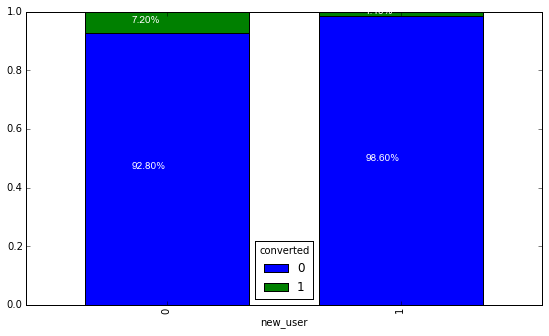

In [38]:
plotStackedBar(dat, "new_user", "converted")

		   converted
+--------+---------+-------+---------+-------+
| source |   False |  True |   Total |  Rate |
+--------+---------+-------+---------+-------+
| Ads    |  85,680 | 3,060 |  88,740 | 3.45% |
| Direct |  70,380 | 2,040 |  72,420 | 2.82% |
| Seo    | 149,940 | 5,100 | 155,040 | 3.29% |
+--------+---------+-------+---------+-------+


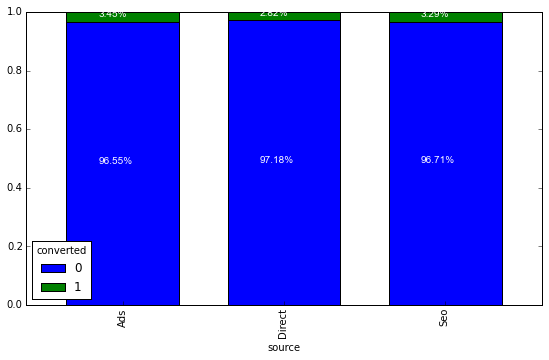

In [39]:
plotStackedBar(dat, "source", "converted")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001F319D68>]], dtype=object)

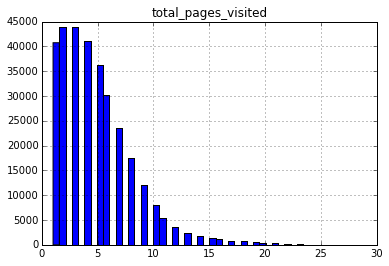

In [43]:
pg_view = dat[["total_pages_visited"]]

pg_view.hist(bins = 50)
#plotStackedBar(dat, "total_pages_visited", "converted")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B6F83C8>]], dtype=object)

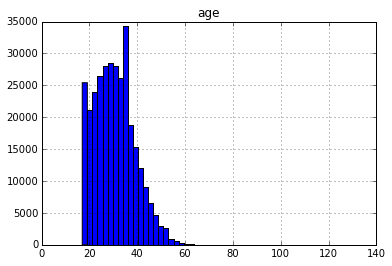

In [44]:
pg_view = dat[["age"]]

pg_view.hist(bins = 50)


In [117]:
#plotStackedBar(dat, "age", "converted")


In [86]:
def labelSuccessXY(row, col, val):
    if row[col] == val:
        return 1
    else:
        return 0

In [108]:

dummy_ranks = pd.get_dummies(dat['country'], prefix='country')
#print dummy_ranks.head()
#    prestige_1  prestige_2  prestige_3  prestige_4
# 0           0           0           1           0
# 1           0           0           1           0
# 2           1           0           0           0
# 3           0           0           0           1
# 4           0           0           0           1

# create a clean data frame for the regression

dat = dat.join(dummy_ranks.ix[:, 'country_Germany':])

dummy_ranks = pd.get_dummies(dat['source'], prefix='source')

dat = dat.join(dummy_ranks.ix[:, 'source_Direct':])

#print dummy_ranks.head()
#    prestige_1  prestige_2  prestige_3  prestige_4
# 0           0           0           1           0
# 1           0           0           1           0
# 2           1           0           0           0
# 3           0           0           0           1
# 4           0           0           0           1

# create a clean data frame for the regression

#data = dat.join(dummy_ranks.ix[:, 'country_China':])
print dat.head()
'''
dat["USFlag"] = dat.apply (lambda row: labelSuccessXY(row,"country", "US"),axis=1)
dat["UKFlag"] = dat.apply (lambda row: labelSuccessXY(row,"country", "UK"),axis=1)
dat["DEFlag"] = dat.apply (lambda row: labelSuccessXY(row,"country", "Germany"),axis=1)

dat["DirFlag"] = dat.apply (lambda row: labelSuccessXY(row,"source", "Direct"),axis=1)
dat["SeoFlag"] = dat.apply (lambda row: labelSuccessXY(row,"source", "Seo"),axis=1)
'''



  country  age  new_user source  total_pages_visited  converted  \
0      UK   25         1    Ads                    1          0   
1      US   23         1    Seo                    5          0   
2      US   28         1    Seo                    4          0   
3   China   39         1    Seo                    5          0   
4      US   30         1    Seo                    6          0   

   country_Germany  country_UK  country_US  source_Direct  source_Seo  
0              0.0         1.0         0.0            0.0         0.0  
1              0.0         0.0         1.0            0.0         1.0  
2              0.0         0.0         1.0            0.0         1.0  
3              0.0         0.0         0.0            0.0         1.0  
4              0.0         0.0         1.0            0.0         1.0  


'\ndat["USFlag"] = dat.apply (lambda row: labelSuccessXY(row,"country", "US"),axis=1)\ndat["UKFlag"] = dat.apply (lambda row: labelSuccessXY(row,"country", "UK"),axis=1)\ndat["DEFlag"] = dat.apply (lambda row: labelSuccessXY(row,"country", "Germany"),axis=1)\n\ndat["DirFlag"] = dat.apply (lambda row: labelSuccessXY(row,"source", "Direct"),axis=1)\ndat["SeoFlag"] = dat.apply (lambda row: labelSuccessXY(row,"source", "Seo"),axis=1)\n'

In [110]:

print dat.head()

  country  age  new_user source  total_pages_visited  converted  \
0      UK   25         1    Ads                    1          0   
1      US   23         1    Seo                    5          0   
2      US   28         1    Seo                    4          0   
3   China   39         1    Seo                    5          0   
4      US   30         1    Seo                    6          0   

   country_Germany  country_UK  country_US  source_Direct  source_Seo  
0              0.0         1.0         0.0            0.0         0.0  
1              0.0         0.0         1.0            0.0         1.0  
2              0.0         0.0         1.0            0.0         1.0  
3              0.0         0.0         0.0            0.0         1.0  
4              0.0         0.0         1.0            0.0         1.0  


In [64]:
#print dat[["country", "USFlag", "UKFlag", "DEFlag"]]

In [88]:
print dat[["source", "DirFlag", "SeoFlag"]].head()

  source  DirFlag  SeoFlag
0    Ads        0        0
1    Seo        0        1
2    Seo        0        1
3    Seo        0        1
4    Seo        0        1


In [111]:
import statsmodels.api as sm
train_cols = ["age", "new_user", "total_pages_visited", "country_Germany", "country_UK","country_US", "source_Direct", "source_Seo"]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

logit = sm.Logit(dat[['converted']], dat[train_cols])

# fit the model
result = logit.fit()
#dat[train_cols]
#dat[['converted']]
#from IPython.display import display, HTML

# Assuming that dataframes df1 and df2 are already defined:
print "Dataframe 1:"
#display(dat[train_cols])



Optimization terminated successfully.
         Current function value: 0.057774
         Iterations 10
Dataframe 1:


In [112]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               316200
Model:                          Logit   Df Residuals:                   316192
Method:                           MLE   Df Model:                            7
Date:                Thu, 26 May 2016   Pseudo R-squ.:                  0.5946
Time:                        22:57:08   Log-Likelihood:                -18268.
converged:                       True   LL-Null:                       -45060.
                                        LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
age                    -0.2486      0.002   -128.310      0.000        -0.252    -0.245
new_user               -2.2197      0.030    -73.224      0.000        -2.279    -2.160
total_pages_visi

In [113]:
print result.conf_int()

                            0         1
age                 -0.252399 -0.244804
new_user            -2.279064 -2.160239
total_pages_visited  0.587563  0.605240
country_Germany      0.314679  0.579031
country_UK           0.154161  0.329367
country_US          -0.199613 -0.058975
source_Direct       -1.139777 -0.982234
source_Seo          -0.956624 -0.834449


In [114]:
print np.exp(result.params)

age                    0.779891
new_user               0.108647
total_pages_visited    1.815574
country_Germany        1.563388
country_UK             1.273494
country_US             0.878716
source_Direct          0.346108
source_Seo             0.408389
dtype: float64


In [115]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                         2.5%     97.5%        OR
age                  0.776935  0.782858  0.779891
new_user             0.102380  0.115298  0.108647
total_pages_visited  1.799597  1.831693  1.815574
country_Germany      1.369820  1.784309  1.563388
country_UK           1.166679  1.390088  1.273494
country_US           0.819048  0.942731  0.878716
source_Direct        0.319890  0.374474  0.346108
source_Seo           0.384188  0.434114  0.408389
